In [114]:
# For Dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
data=pd.read_csv("police-shootings-data.csv")

In [116]:
# Data Cleaning

In [117]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [119]:
data.isnull()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5412,False,False,False,False,False,True,False,True,False,False,False,False,False,False
5413,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5414,False,False,False,False,False,False,False,True,False,False,False,False,False,False


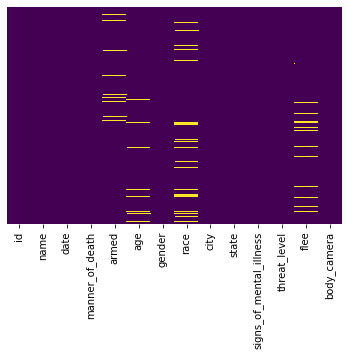

In [120]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="viridis")

In [121]:
data["armed"].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'baton', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake',
       'crowbar', 'oar', 'machete and gun', 'tire iron',
 

In [122]:
data[data["armed"].isnull()].count()

id                         227
name                       227
date                       227
manner_of_death            227
armed                        0
age                        221
gender                     227
race                       217
city                       227
state                      227
signs_of_mental_illness    227
threat_level               227
flee                       219
body_camera                227
dtype: int64

In [123]:
data.drop("armed", inplace=True, axis=1)

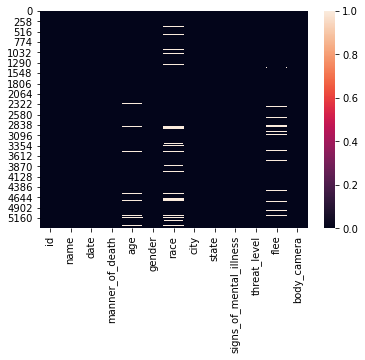

In [124]:
sns.heatmap(data.isnull())

In [125]:
data[data["flee"].isnull()].count()

id                         249
name                       249
date                       249
manner_of_death            249
age                        231
gender                     249
race                       207
city                       249
state                      249
signs_of_mental_illness    249
threat_level               249
flee                         0
body_camera                249
dtype: int64

In [126]:
data["flee"].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other', nan], dtype=object)

In [127]:
data["flee"].fillna("Other", inplace=True)

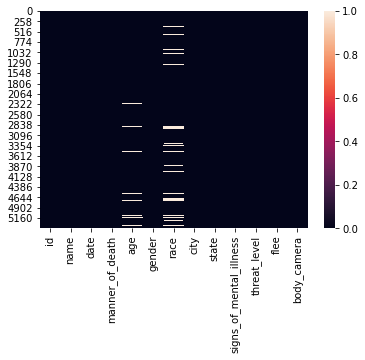

In [128]:
sns.heatmap(data.isnull())

In [129]:
data[data["age"].isnull()].count()

id                         235
name                       235
date                       235
manner_of_death            235
age                          0
gender                     234
race                        85
city                       235
state                      235
signs_of_mental_illness    235
threat_level               235
flee                       235
body_camera                235
dtype: int64

In [130]:
data["age"].groupby(data["race"]).mean()

race
A    36.549451
B    32.463893
H    33.589977
N    31.662338
O    32.978723
W    39.947196
Name: age, dtype: float64

In [131]:
def impude_age (cols):
    age = cols[0]
    race = cols[1]
    if pd.isnull(age):
        if race == 'A':
            return 37
        elif race == 'B':
            return 32
        elif race == 'H':
            return 34
        elif race == 'N':
            return 31
        elif race == 'O':
            return 33
        else:
            return 40
    else:
        return age

In [132]:
data["age"]=data[["age", "race"]].apply(impude_age,axis=1 )

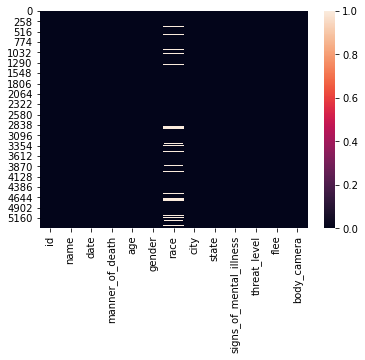

In [133]:
sns.heatmap(data.isnull())

In [134]:
data["race"].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [135]:
data[data["race"].isnull()].count()

id                         521
name                       521
date                       521
manner_of_death            521
age                        521
gender                     520
race                         0
city                       521
state                      521
signs_of_mental_illness    521
threat_level               521
flee                       521
body_camera                521
dtype: int64

In [136]:
data["race"].fillna("nan", inplace=True)

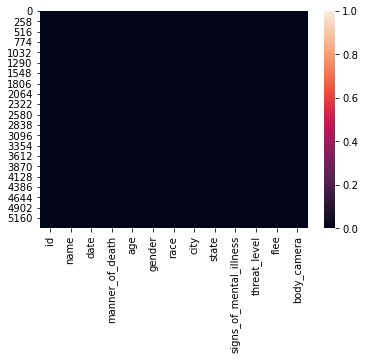

In [137]:
sns.heatmap(data.isnull())

In [138]:
data.dropna(inplace=True)

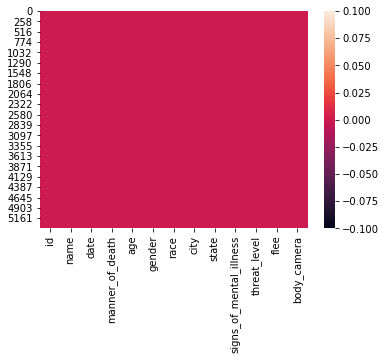

In [139]:
sns.heatmap(data.isnull())

In [140]:
# Visualisierung

In [186]:
data.head()

,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,shot,shot and Tasered
0,3,Tim Elliot,2015-01-02,shot,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1,0
1,4,Lewis Lee Lembke,2015-01-02,shot,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1,0
2,5,John Paul Quintero,2015-01-03,shot and Tasered,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,0,1
3,8,Matthew Hoffman,2015-01-04,shot,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1,0
4,9,Michael Rodriguez,2015-01-04,shot,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1,0


In [187]:
# Number of deaths by gender and race

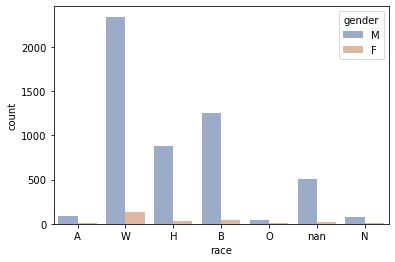

In [188]:
sns.countplot(x='race', data = data, hue= 'gender', palette = 'deep', alpha = 0.6)

In [189]:
# Deaths by age

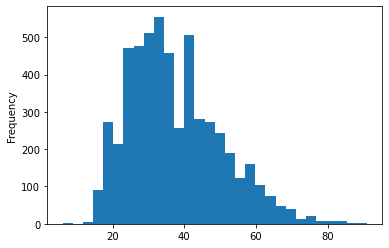

In [190]:
data["age"].plot.hist(bins=30)

In [191]:
# manner of death

In [192]:
new = pd.get_dummies(data['manner_of_death'])
data = pd.concat([data, new], axis = 1)

In [193]:
data.head()

,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,shot,shot and Tasered,shot,shot and Tasered
0,3,Tim Elliot,2015-01-02,shot,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1,0,1,0
1,4,Lewis Lee Lembke,2015-01-02,shot,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1,0,1,0
2,5,John Paul Quintero,2015-01-03,shot and Tasered,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,0,1,0,1
3,8,Matthew Hoffman,2015-01-04,shot,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1,0,1,0
4,9,Michael Rodriguez,2015-01-04,shot,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1,0,1,0


In [194]:
# Deaths by State and City (the first 10)

In [195]:
state_wise = data["manner_of_death"].groupby(data["state"]).count().sort_values(ascending=False)[0:10]

In [196]:
state_wise = pd.DataFrame(state_wise)
sw=state_wise.reset_index()

In [197]:
sw.head()

,state,manner_of_death
0,CA,799
1,TX,481
2,FL,350
3,AZ,254
4,CO,195


Text(0, 0.5, 'Number of Cases')

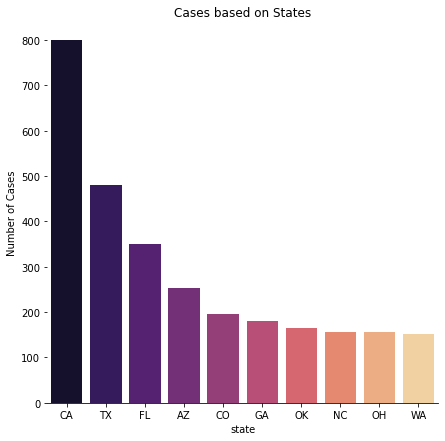

In [198]:
by_states = sns.barplot(x='state', y='manner_of_death', data = sw, palette = 'magma')
fig=plt.gcf()
fig.set_size_inches(7,7)
sns.despine(left=True)
by_states.set_title('Cases based on States')
by_states.set_ylabel('Number of Cases')

In [199]:
city_wise = data["manner_of_death"].groupby(data["city"]).count().sort_values(ascending = False)[0:10]

In [200]:
city_wise = pd.DataFrame(city_wise)
cw = city_wise.reset_index()

In [201]:
cw.head()

,city,manner_of_death
0,Los Angeles,85
1,Phoenix,78
2,Houston,57
3,Las Vegas,45
4,San Antonio,43


Text(0, 0.5, 'Number of Cases')

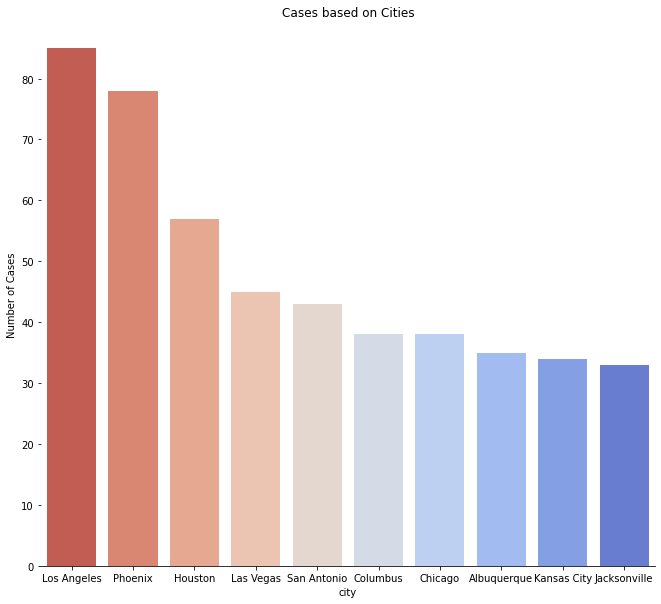

In [202]:
by_city = sns.barplot(x='city', y='manner_of_death', data = cw, palette = 'coolwarm_r')
fig=plt.gcf()
fig.set_size_inches(11,10)
sns.despine(left=True)
by_city.set_title('Cases based on Cities')
by_city.set_ylabel('Number of Cases')

In [203]:
# Cause of death Shoot by age group

In [204]:
age_25 = data[(data['age']<25) & (data['shot'] == 1)]
age_25 = age_25.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [205]:
age_25 = data[(data['age']>25) & (data['shot'] == 1)]
age_25 = age_25.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [206]:
age_35 = data[(data["age"]>35) & (data["shot"] ==1)]
age_35 = age_35.groupby(data["state"]).count()["shot"].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [207]:
age_45 = data[(data["age"]>45) & (data["shot"]==1)]
age_45 = age_45.groupby(data["state"]).count()["shot"].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [208]:
age_55 = data[(data["age"]>55) & (data["shot"]==1)]
age_55 = age_55.groupby(data["state"]).count()["shot"].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [209]:
age_65 = data[(data["age"]>65) & (data["shot"]==1)]
age_65 = age_65.groupby(data["state"]).count()["shot"].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
age_75 = data[(data["age"]>75) & (data["shot"]==1)]
age_75 = age_75.groupby(data["state"]).count()["shot"].sort_values(ascending=False)[0:10].reset_index()

In [210]:
age_85 = data[(data["age"]>85) & (data["shot"]==1)]
age_85 = age_85.groupby(data["state"]).count()["shot"].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
age_95 = data[(data["age"]>95) & (data["shot"]==1)]
age_95 = age_95.groupby(data["state"]).count()["shot"].sort_values(ascending=False)[0:10].reset_index()

Text(0.5, 0, 'States')

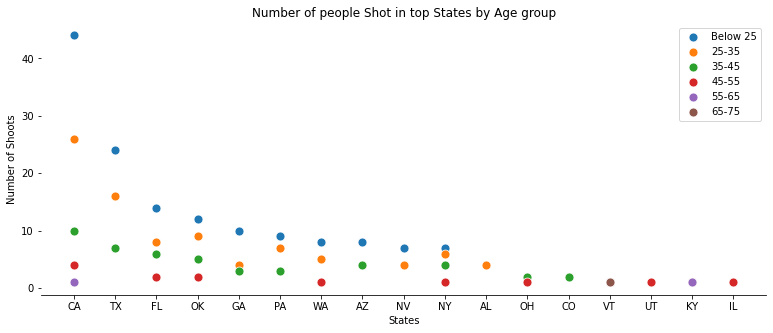

In [211]:
sns.scatterplot(x='state', y='shot', data=age_25, s = 80, label= 'Below 25')
sns.scatterplot(x='state', y='shot', data=age_35 , s = 80,label= '25-35' )
sns.scatterplot(x='state', y='shot', data=age_45, s = 80,label= '35-45')
sns.scatterplot(x='state', y='shot', data=age_55,s = 80,label= '45-55')
sns.scatterplot(x='state', y='shot', data=age_65, s = 80,label= '55-65')
sns.scatterplot(x='state', y='shot', data=age_75 ,s = 80,label= '65-75')
sns.scatterplot(x='state', y='shot', data=age_85, s = 80,label= '75-85')
ty = sns.scatterplot(x='state', y='shot', data=age_95, s = 80, label= '85-95')
fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)
ty.set_title('Number of people Shot in top States by Age group')
ty.set_ylabel('Number of Shoots')
ty.set_xlabel('States')

In [212]:
# Shot and Tasered

In [213]:
age_25 = data[(data['age']<25) & (data['shot'] == 0)]
age_25 = age_25.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
age_25 = data[(data['age']>25) & (data['shot'] == 0)]
age_25 = age_25.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

In [ ]:
age_35 = data[(data['age']>35) & (data['shot'] == 0)]
age_35 = age_35.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

In [ ]:
age_45 = data[(data['age']>45) & (data['shot'] == 0)]
age_45 = age_45.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

In [214]:
age_55 = data[(data['age']>55) & (data['shot'] == 0)]
age_55 = age_55.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [215]:
age_65 = data[(data['age']>65) & (data['shot'] == 0)]
age_65 = age_65.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
age_75 = data[(data['age']>75) & (data['shot'] == 0)]
age_75 = age_75.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

In [216]:
age_85 = data[(data['age']>85) & (data['shot'] == 0)]
age_85 = age_85.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
age_95 = data[(data['age']>95) & (data['shot'] == 0)]
age_95 = age_95.groupby('state').count()['shot'].sort_values(ascending=False)[0:10].reset_index()

Text(0.5, 0, 'States')

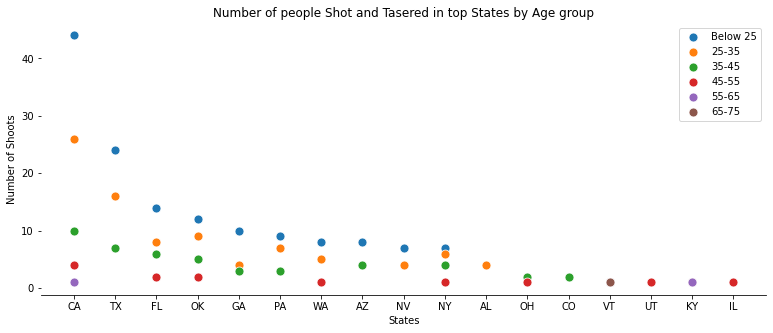

In [217]:
sns.scatterplot(x='state', y='shot', data=age_25, s = 80, label= 'Below 25')
sns.scatterplot(x='state', y='shot', data=age_35 , s = 80,label= '25-35' )
sns.scatterplot(x='state', y='shot', data=age_45, s = 80,label= '35-45')
sns.scatterplot(x='state', y='shot', data=age_55,s = 80,label= '45-55')
sns.scatterplot(x='state', y='shot', data=age_65, s = 80,label= '55-65')
sns.scatterplot(x='state', y='shot', data=age_75 ,s = 80,label= '65-75')
sns.scatterplot(x='state', y='shot', data=age_85, s = 80,label= '75-85')
ty = sns.scatterplot(x='state', y='shot', data=age_95, s = 80, label= '85-95')
fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)
ty.set_title('Number of people Shot and Tasered in top States by Age group')
ty.set_ylabel('Number of Shoots')
ty.set_xlabel('States')

In [218]:
# Deaths by gender and race

In [219]:
female_crimes = data[data['gender']=='F']
f_c = female_crimes['gender'].groupby(data['race']).count().sort_values(ascending=False)
f_c = pd.DataFrame(f_c)
f_c = f_c.reset_index()

Text(0, 0.5, 'Number of Cases')

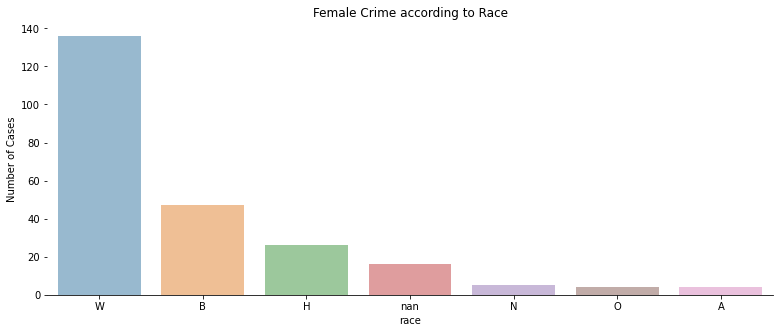

In [220]:
ty= sns.barplot(x= 'race', y= 'gender', data=f_c, alpha=0.5)
fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)
ty.set_title('Female Crime according to Race')
ty.set_ylabel('Number of Cases')

In [222]:
male_crimes = data[data['gender']=='M']
m_c = male_crimes['gender'].groupby(data['race']).count().sort_values(ascending=False)
m_c = pd.DataFrame(m_c)
m_c = m_c.reset_index()

Text(0, 0.5, 'Number of Cases')

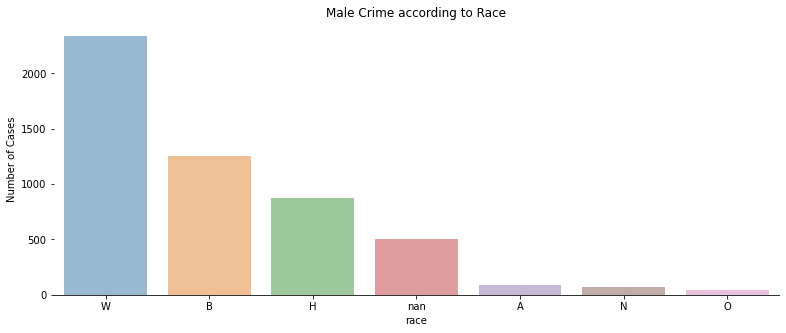

In [223]:
ty= sns.barplot(x= 'race', y= 'gender', data=m_c, alpha=0.5)
fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)
ty.set_title('Male Crime according to Race')
ty.set_ylabel('Number of Cases')

In [224]:
# Top 10 states with female deaths

Text(0, 0.5, 'Number of Cases')

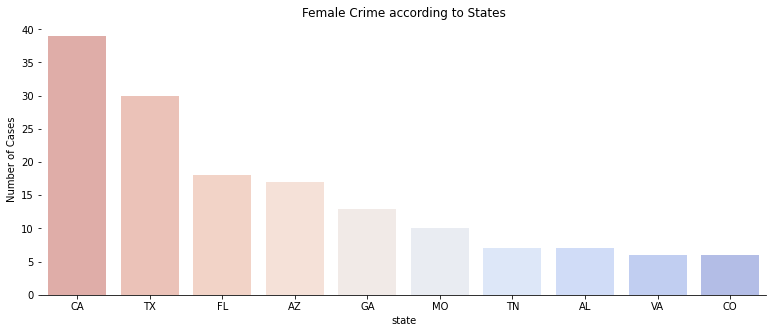

In [225]:
female_crimes = data['gender'] == 'F'
f_c_1 = data[female_crimes]['gender'].groupby(data['state']).count().sort_values(ascending=False)[0:10]
f_c_1 = pd.DataFrame(f_c_1)
f_c_1 = f_c_1.reset_index()
ty_1 = sns.barplot(x= 'state', y= 'gender', data=f_c_1, alpha=0.5, palette= 'coolwarm_r')

fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)
ty_1.set_title('Female Crime according to States')
ty_1.set_ylabel('Number of Cases')

In [226]:
# Top 10 cities with female deaths

Text(0, 0.5, 'Number of Cases')

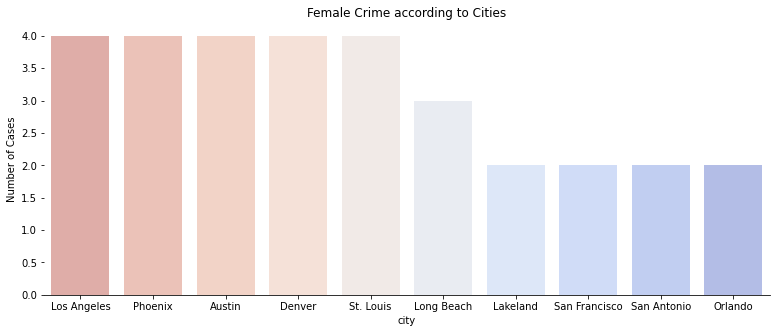

In [227]:
female_crimes = data['gender'] == 'F'
f_c_2 = data[female_crimes]['gender'].groupby(data['city']).count().sort_values(ascending=False)[0:10]
f_c_2 = pd.DataFrame(f_c_2)
f_c_2 = f_c_2.reset_index()
ty_2 = sns.barplot(x= 'city', y= 'gender', data=f_c_2, alpha=0.5, palette= 'coolwarm_r')

fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)
ty_2.set_title('Female Crime according to Cities')
ty_2.set_ylabel('Number of Cases')

In [228]:
# Top 10 states with male deaths

Text(0, 0.5, 'Number of Cases')

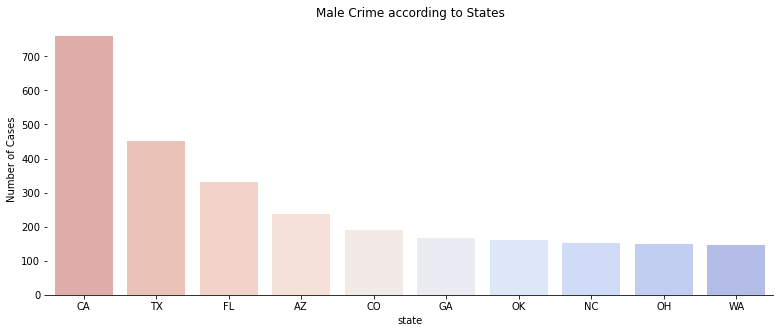

In [229]:
male_crimes = data['gender'] == 'M'
m_c_1 = data[male_crimes]['gender'].groupby(data['state']).count().sort_values(ascending=False)[0:10]
m_c_1 = pd.DataFrame(m_c_1)
m_c_1 = m_c_1.reset_index()
ty_1 = sns.barplot(x= 'state', y= 'gender', data=m_c_1, alpha=0.5, palette= 'coolwarm_r')

fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)
ty_1.set_title('Male Crime according to States')
ty_1.set_ylabel('Number of Cases')

In [230]:
# Top 10 cities with male deaths

Text(0, 0.5, 'Number of Cases')

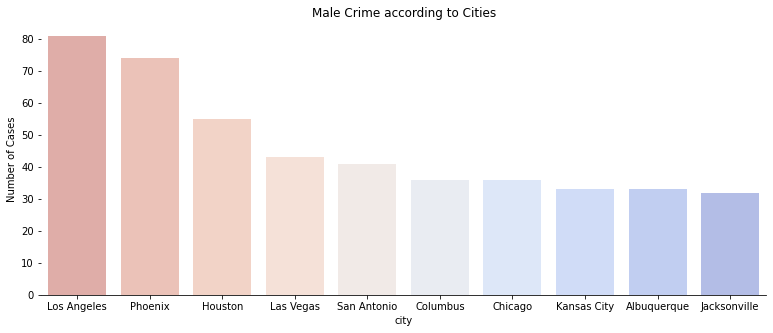

In [231]:
male_crimes = data['gender'] == 'M'
m_c_2 = data[male_crimes]['gender'].groupby(data['city']).count().sort_values(ascending=False)[0:10]
m_c_2 = pd.DataFrame(m_c_2)
m_c_2 = m_c_2.reset_index()
ty_2 = sns.barplot(x= 'city', y= 'gender', data=m_c_2, alpha=0.5, palette= 'coolwarm_r')

fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)
ty_2.set_title('Male Crime according to Cities')
ty_2.set_ylabel('Number of Cases')

In [237]:
# Signs of mental illness

Text(0.5, 0, 'Race')

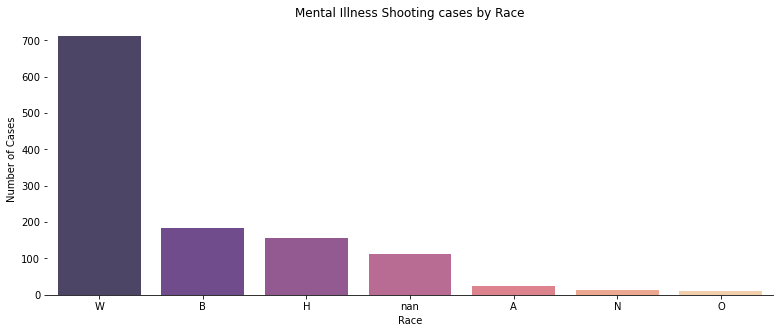

In [235]:
illness_by_race = data[data['signs_of_mental_illness'] == True].groupby(data['race']).count()['signs_of_mental_illness'].sort_values(ascending=False)
illness_by_race = pd.DataFrame(illness_by_race)
illness_by_race = illness_by_race.reset_index()
ty_2 = sns.barplot(x= 'race', y= 'signs_of_mental_illness', data=illness_by_race, alpha=0.8, palette= 'magma')

fig=plt.gcf()
fig.set_size_inches(13,5)
sns.despine(left=True)
ty_2.set_title('Mental Illness Shooting cases by Race')
ty_2.set_ylabel('Number of Cases')
ty_2.set_xlabel('Race')

In [238]:
data[data['signs_of_mental_illness'] == True].count()

id                         1215
name                       1215
date                       1215
manner_of_death            1215
age                        1215
gender                     1215
race                       1215
city                       1215
state                      1215
signs_of_mental_illness    1215
threat_level               1215
flee                       1215
body_camera                1215
shot                       1215
shot and Tasered           1215
shot                       1215
shot and Tasered           1215
dtype: int64

In [239]:
# Body Camera

Text(0.5, 0, 'Camera')

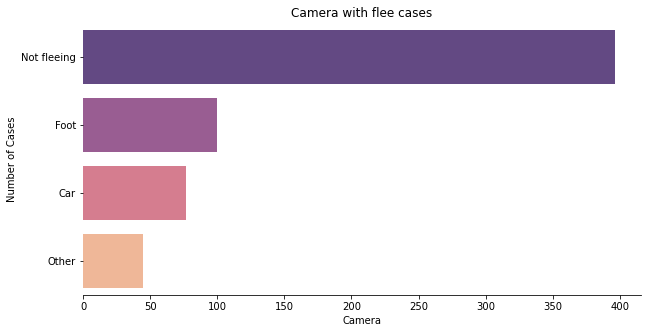

In [240]:
camera_by_flee = data[data['body_camera'] == True].groupby(data['flee']).count()['body_camera'].sort_values(ascending=False)
camera_by_flee = pd.DataFrame(camera_by_flee)
camera_by_flee = camera_by_flee.reset_index()
ty_2 = sns.barplot(x= 'body_camera', y= 'flee', data=camera_by_flee, alpha=0.8, palette= 'magma')

fig=plt.gcf()
fig.set_size_inches(10,5)
sns.despine(left=True)
ty_2.set_title('Camera with flee cases')
ty_2.set_ylabel('Number of Cases')
ty_2.set_xlabel('Camera')

In [241]:
data[data["body_camera"]].count()

id                         618
name                       618
date                       618
manner_of_death            618
age                        618
gender                     618
race                       618
city                       618
state                      618
signs_of_mental_illness    618
threat_level               618
flee                       618
body_camera                618
shot                       618
shot and Tasered           618
shot                       618
shot and Tasered           618
dtype: int64